## Market Basket Analysis

#### Import libraries

In [1]:
library(arules)
library(arulesViz)

Warning message:
"package 'arules' was built under R version 3.6.3"Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write

Warning message:
"package 'arulesViz' was built under R version 3.6.3"Loading required package: grid
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


#### Load in data

In [2]:
transactions <- read.transactions('R Projects/Association Rules/ElectronidexTransactions2017.csv', format = 'basket', sep = ',', rm.duplicates = FALSE)

Warning message in readLines(file, encoding = encoding):
"incomplete final line found on 'R Projects/Association Rules/ElectronidexTransactions2017.csv'"Warning message in asMethod(object):
"removing duplicated items in transactions"

#### EDA / Visualizations

In [3]:
summary(transactions)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 125 columns (items) and a density of 0.03506172 

most frequent items:
                    iMac                HP Laptop CYBERPOWER Gamer Desktop 
                    2519                     1909                     1809 
           Apple Earpods        Apple MacBook Air                  (Other) 
                    1715                     1530                    33622 

element (itemset/transaction) length distribution:
sizes
   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
   2 2163 1647 1294 1021  856  646  540  439  353  247  171  119   77   72   56 
  16   17   18   19   20   21   22   23   25   26   27   29   30 
  41   26   20   10   10   10    5    3    1    1    3    1    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   3.000   4.383   6.000  30.000 

includes extended item information - examples:
                            

##### - 9,835 transactions and 125 different items.
##### - On average, transactions contained roughly 4 items (median of 3)

In [4]:
inspect(sample(transactions, 10))

     items                                  
[1]  {AOC Monitor,                          
      CYBERPOWER Gamer Desktop,             
      Eluktronics Pro Gaming Laptop,        
      iMac}                                 
[2]  {3-Button Mouse,                       
      DOSS Touch Wireless Bluetooth,        
      iMac,                                 
      Lenovo Desktop Computer,              
      Rii LED Gaming Keyboard & Mouse Combo}
[3]  {3-Button Mouse,                       
      Dell Desktop,                         
      HP Monitor}                           
[4]  {Apple MacBook Pro,                    
      HP Monitor,                           
      HP Wireless Printer}                  
[5]  {Apple Wireless Keyboard,              
      Bose Companion Speakers}              
[6]  {Eluktronics Pro Gaming Laptop,        
      Etekcity Power Extension Cord Cable,  
      HP Wireless Printer,                  
      Microsoft Basic Optical Mouse,        
      Pana

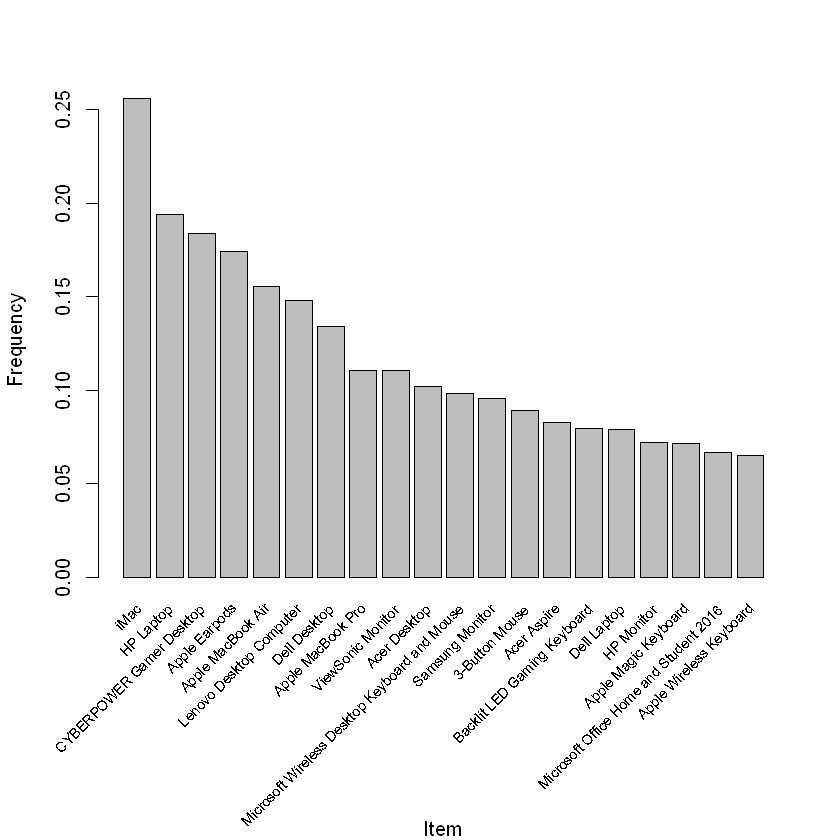

In [5]:
itemFrequencyPlot(transactions, topN = 20, type = 'relative', xlab = 'Item', ylab = 'Frequency', cex.names = .7)

##### - Over a quarter of purchases included an iMac

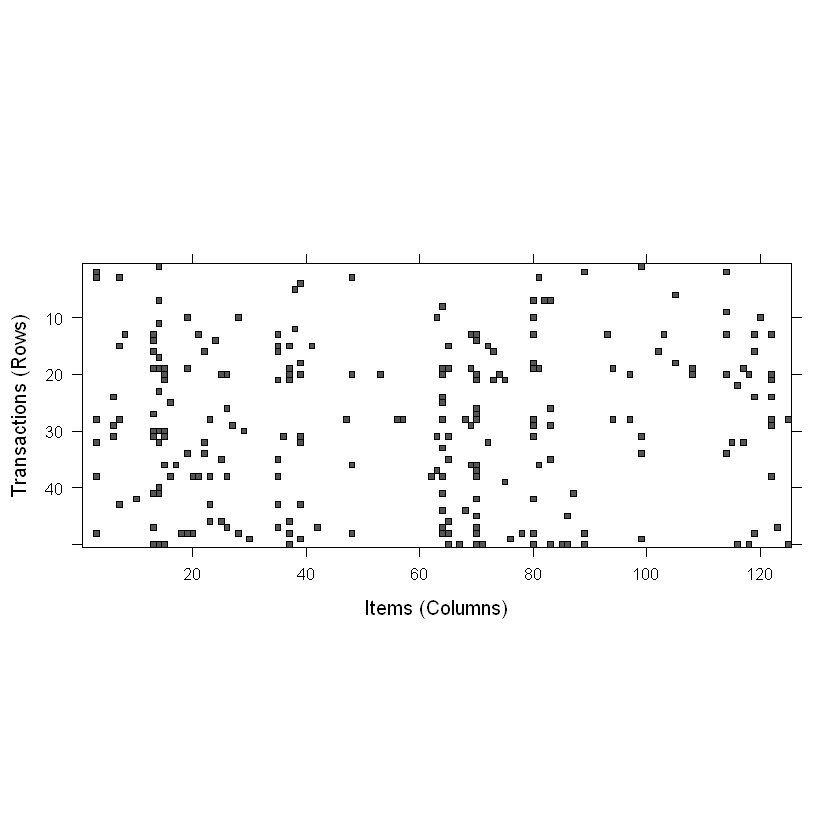

In [6]:
image(sample(transactions, 50))

#### Create Rules

In [7]:
rules <- apriori(transactions, parameter = list(supp = .01, conf = .45))
summary(rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.45    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 98 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[125 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [82 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [37 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 37 rules

rule length distribution (lhs + rhs):sizes
 2  3 
 4 33 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.000   3.000   2.892   3.000   3.000 

summary of quality measures:
    support          confidence        coverage            lift      
 Min.   :0.01007   Min.   :0.4511   Min.   :0.01739   Min.   :1.761  
 1st Qu.:0.01088   1st Qu.:0.4742   1st Qu.:0.02206   1st Qu.:1.927  
 Median :0.01281   Median :0.5000   Median :0.02430   Median :2.058  
 Mean   :0.01543   Mean   :0.5101   Mean   :0.03076   Mean   :2.144  
 3rd Qu.:0.01596   3rd Qu.:0.5440   3rd Qu.:0.03233   3rd Qu.:2.308  
 Max.   :0.03233   Max.   :0.6023   Max.   :0.07168   Max.   :3.103  
     count      
 Min.   : 99.0  
 1st Qu.:107.0  
 Median :126.0  
 Mean   :151.7  
 3rd Qu.:157.0  
 Max.   :318.0  

mining info:
         data ntransactions support confidence
 transactions          9835    0.01       0.45

##### - 37 rules using support = .01 and conf = .45. These were about the highest these numbers could go while still allowing for rule creation.

#### Inspect rules

In [8]:
inspect(rules[0:10])

     lhs                                         rhs            support confidence   coverage     lift count
[1]  {ASUS 2 Monitor}                         => {iMac}      0.02806304  0.4867725 0.05765125 1.900519   276
[2]  {ASUS Monitor}                           => {iMac}      0.02765633  0.4990826 0.05541434 1.948582   272
[3]  {Microsoft Office Home and Student 2016} => {iMac}      0.03101169  0.4663609 0.06649720 1.820825   305
[4]  {Apple Magic Keyboard}                   => {iMac}      0.03233350  0.4510638 0.07168277 1.761101   318
[5]  {HP Laptop,                                                                                            
      LG Monitor}                             => {iMac}      0.01026945  0.4741784 0.02165735 1.851348   101
[6]  {iMac,                                                                                                 
      LG Monitor}                             => {HP Laptop} 0.01026945  0.4611872 0.02226741 2.375996   101
[7]  {ASUS 2 Monito

In [9]:
inspect(sort(rules, by = 'support')[0:10])

     lhs                                         rhs         support   
[1]  {Apple Magic Keyboard}                   => {iMac}      0.03233350
[2]  {Microsoft Office Home and Student 2016} => {iMac}      0.03101169
[3]  {ASUS 2 Monitor}                         => {iMac}      0.02806304
[4]  {ASUS Monitor}                           => {iMac}      0.02765633
[5]  {HP Laptop,ViewSonic Monitor}            => {iMac}      0.02369090
[6]  {iMac,ViewSonic Monitor}                 => {HP Laptop} 0.02369090
[7]  {HP Laptop,Lenovo Desktop Computer}      => {iMac}      0.02308083
[8]  {Dell Desktop,HP Laptop}                 => {iMac}      0.02226741
[9]  {Dell Desktop,Lenovo Desktop Computer}   => {iMac}      0.01860702
[10] {Acer Desktop,HP Laptop}                 => {iMac}      0.01596340
     confidence coverage   lift     count
[1]  0.4510638  0.07168277 1.761101 318  
[2]  0.4663609  0.06649720 1.820825 305  
[3]  0.4867725  0.05765125 1.900519 276  
[4]  0.4990826  0.05541434 1.948582 272 

##### - First impression is that there are a lot of different itmes (or item combinations) that lead to a customer buying an iMac. Looking at the top rules, it makes sense that if someone buys a computer accessory, they would also be buying the computer, but interestingly the rules do not state the inverse is true (that people buying an iMac also buy an accessory). 

In [10]:
sum(is.redundant(rules))

[1] 0

##### - No redundant rules

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


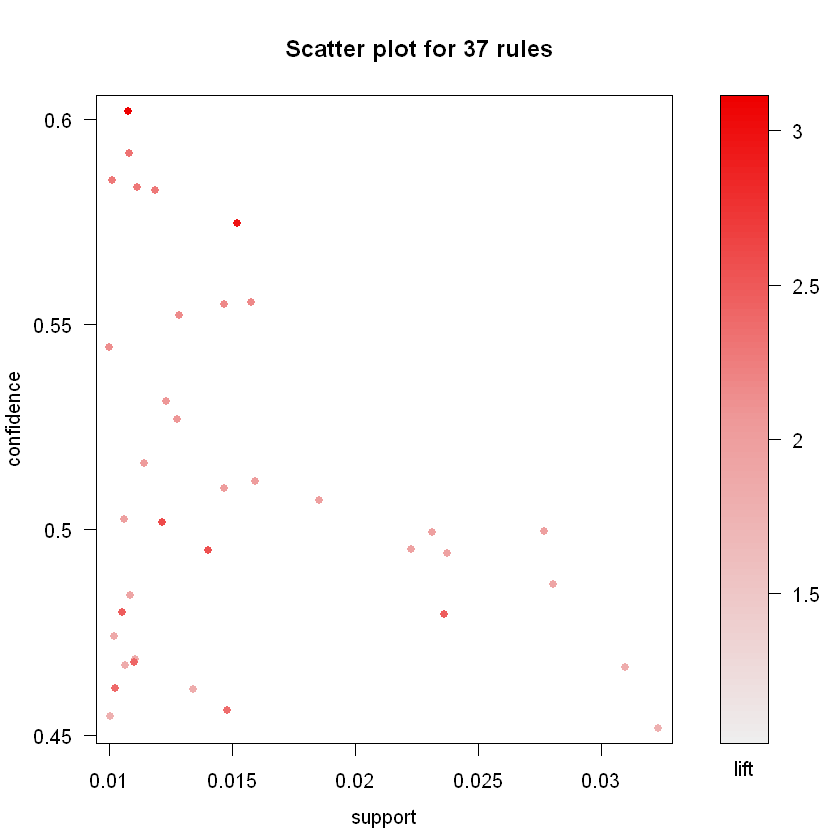

In [11]:
plot(rules)

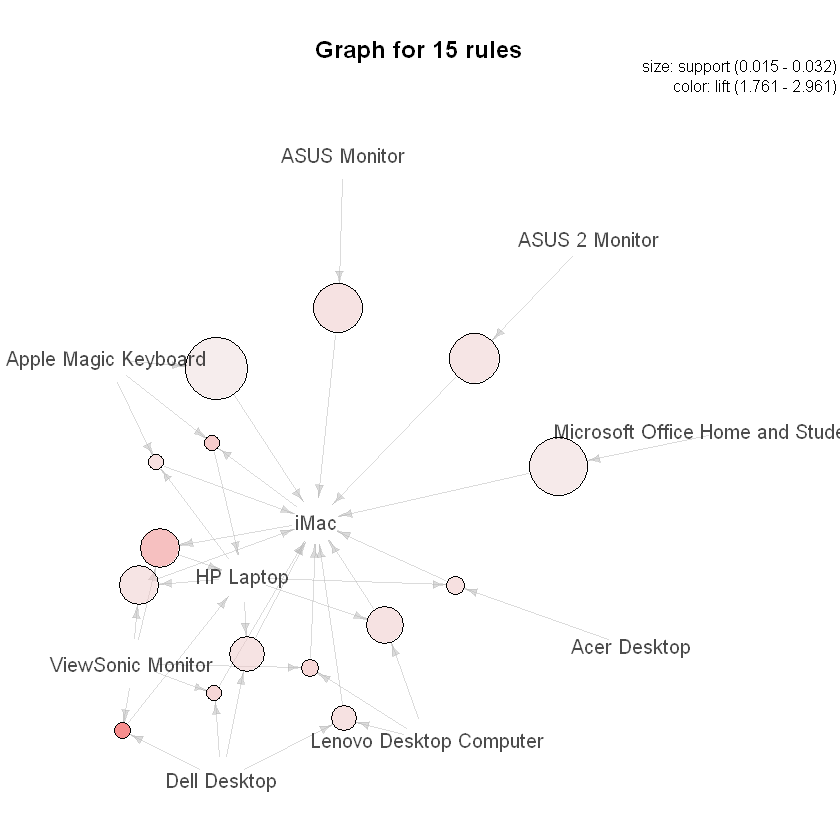

In [12]:
plot(sort(rules, by = 'support')[0:15], method = 'graph')

##### - This company should offer promotions pushing iMacs and HP Laptops to customers who buy or view computer-related accessories. Specifically, keyboards, monitors, and Microsoft Office are strong indicators of a customer also buying an iMac or HP Laptop.